In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
import cv2
import csv

In [2]:
bgr_array = cv2.imread('IMG_LEARN.jpg')
sea = pd.read_csv('./sea.csv', header = None)
land = pd.read_csv('./land.csv', header = None)
sea = sea.values
land = land.values
bgr = []
for i in range(500):
    bgr.append(np.append(bgr_array[sea[i][1], sea[i][0], :], 1))

for i in range(500):
    bgr.append(np.append(bgr_array[land[i][1], land[i][0], :], 2))

with open('bgr.csv', 'w') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerows(bgr)

In [3]:
bgr_array = cv2.imread('IMG_TEST.jpg')
answer = pd.read_csv('./answer.csv', header = None)
answer = answer.values
bgr = []
for i in range(5):
    bgr.append(np.append(bgr_array[answer[i][1], answer[i][0], :], 1))
for i in range(5,15):
    bgr.append(np.append(bgr_array[answer[i][1], answer[i][0], :], 2))

with open('answer_bgr.csv', 'w') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerows(bgr)

In [4]:
data = pd.read_csv('./bgr.csv', header = None)
test = pd.read_csv('./answer_bgr.csv', header = None)
data = data.values
test = test.values
X_data = data[:,:-1]
y_data = data[:,-1]
X_test = test[:,:-1]
y_test = test[:,-1]
mlp = MLPClassifier(solver = "lbfgs", random_state = 0,hidden_layer_sizes = [10]).fit(X_data, y_data)
predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]
print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(mlp.score(X_data, y_data)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))
print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

予測結果 
 sea:[1 2 1 1 1] 
 land:[2 2 2 2 2 2 2 2 2 2]
Accuracy on training set: 1.000
Accuracy on test set: 0.933
F1 score: 0.8889


In [5]:
mlp = MLPClassifier(solver = "lbfgs", random_state = 0, hidden_layer_sizes = [10, 10]).fit(X_data, y_data)
predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]
print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(mlp.score(X_data, y_data)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))
print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

予測結果 
 sea:[1 2 1 2 1] 
 land:[2 2 2 1 2 2 2 2 2 2]
Accuracy on training set: 0.995
Accuracy on test set: 0.800
F1 score: 0.6667


In [6]:
mlp = MLPClassifier(solver = "lbfgs", random_state = 0, hidden_layer_sizes = [10, 10, 10]).fit(X_data, y_data)
predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]
print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(mlp.score(X_data, y_data)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))
print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

予測結果 
 sea:[1 2 1 2 1] 
 land:[2 2 2 1 2 2 2 2 2 2]
Accuracy on training set: 0.995
Accuracy on test set: 0.800
F1 score: 0.6667


In [7]:
mlp = MLPClassifier(solver = "lbfgs", random_state = 0, hidden_layer_sizes = [100]).fit(X_data, y_data)
predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]
print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(mlp.score(X_data, y_data)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))
print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

予測結果 
 sea:[1 2 1 1 1] 
 land:[2 2 2 2 2 2 2 2 2 2]
Accuracy on training set: 1.000
Accuracy on test set: 0.933
F1 score: 0.8889


In [8]:
mlp = MLPClassifier(solver = "lbfgs", random_state = 0, hidden_layer_sizes = [100, 100]).fit(X_data, y_data)
predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]
print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(mlp.score(X_data, y_data)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))
print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

予測結果 
 sea:[1 2 1 2 2] 
 land:[2 2 2 1 2 2 2 2 2 2]
Accuracy on training set: 0.998
Accuracy on test set: 0.733
F1 score: 0.5000


In [9]:
mlp = MLPClassifier(solver = "lbfgs", random_state = 0, hidden_layer_sizes = [100, 100, 100]).fit(X_data, y_data)
predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]
print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(mlp.score(X_data, y_data)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))
print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

予測結果 
 sea:[1 2 1 2 1] 
 land:[2 2 2 1 2 2 2 2 2 2]
Accuracy on training set: 0.999
Accuracy on test set: 0.800
F1 score: 0.6667


In [10]:
mlp = MLPClassifier(solver = "lbfgs", random_state = 0, hidden_layer_sizes = [10, 10, 10, 10]).fit(X_data, y_data)
predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]
print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(mlp.score(X_data, y_data)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))
print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

予測結果 
 sea:[1 2 2 2 2] 
 land:[2 2 2 1 2 2 2 2 2 2]
Accuracy on training set: 0.997
Accuracy on test set: 0.667
F1 score: 0.2857


In [11]:
mlp = MLPClassifier(solver = "lbfgs", random_state = 0, hidden_layer_sizes = [10, 10, 10, 10, 10]).fit(X_data, y_data)
predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]
print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(mlp.score(X_data, y_data)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))
print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

予測結果 
 sea:[1 2 2 2 2] 
 land:[2 2 2 1 2 2 2 2 2 2]
Accuracy on training set: 0.997
Accuracy on test set: 0.667
F1 score: 0.2857


In [12]:
mlp = MLPClassifier(solver = "lbfgs", random_state = 0, max_iter = 500, hidden_layer_sizes = [1000]).fit(X_data, y_data)
predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]
print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(mlp.score(X_data, y_data)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))
print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

予測結果 
 sea:[1 2 1 2 2] 
 land:[2 2 2 2 2 2 2 2 2 2]
Accuracy on training set: 1.000
Accuracy on test set: 0.800
F1 score: 0.5714


In [13]:
mlp = MLPClassifier(solver = "lbfgs", random_state = 0, hidden_layer_sizes = [46, 46, 46]).fit(X_data, y_data)
predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]
print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(mlp.score(X_data, y_data)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))
print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

予測結果 
 sea:[1 1 1 1 1] 
 land:[2 2 2 1 2 2 2 2 2 2]
Accuracy on training set: 0.997
Accuracy on test set: 0.933
F1 score: 0.9091


In [14]:
mlp = MLPClassifier(solver = "lbfgs", random_state = 0, max_iter = 500, hidden_layer_sizes = [160]).fit(X_data, y_data)
predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]
print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(mlp.score(X_data, y_data)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))
print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

予測結果 
 sea:[1 1 1 1 1] 
 land:[2 2 2 2 2 2 2 2 2 2]
Accuracy on training set: 1.000
Accuracy on test set: 1.000
F1 score: 1.0000


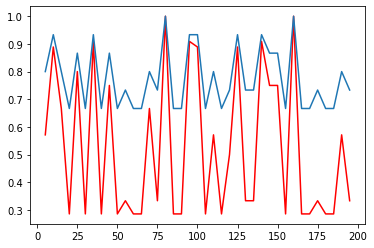

In [15]:
x = []
y_f1 = []
y_score = []
for i in range(5, 200, 5):
    mlp = MLPClassifier(solver = "lbfgs", random_state = 0,  max_iter = 500, hidden_layer_sizes = [i]).fit(X_data, y_data)
    predict = mlp.predict(X_test)
    x.append(i)
    y_f1.append(f1_score(y_test, predict))
    y_score.append(mlp.score(X_test, y_test))

plt.plot(x, y_f1, color = "red")
plt.plot(x, y_score)


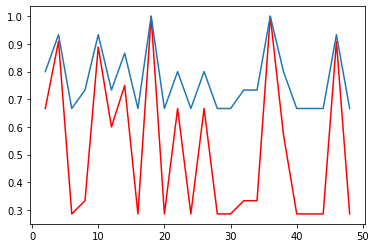

In [16]:
x = []
y_f1_1 = []
y_score_1 = []
for i in range(2, 50, 2):
    mlp = MLPClassifier(solver = "lbfgs", random_state = 0,  max_iter = 500, hidden_layer_sizes = [i]).fit(X_data, y_data)
    predict = mlp.predict(X_test)
    x.append(i)
    y_f1_1.append(f1_score(y_test, predict))
    y_score_1.append(mlp.score(X_test, y_test))

plt.plot(x, y_f1_1, color = "red")
plt.plot(x, y_score_1)

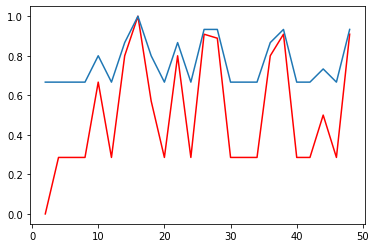

In [17]:
x_2 = []
y_f1_2 = []
y_score_2 = []
for i in range(2, 50, 2):
    mlp = MLPClassifier(solver = "lbfgs", random_state = 0,  max_iter = 500, hidden_layer_sizes = [i, i]).fit(X_data, y_data)
    predict = mlp.predict(X_test)
    x_2.append(i)
    y_f1_2.append(f1_score(y_test, predict))
    y_score_2.append(mlp.score(X_test, y_test))

plt.plot(x_2, y_f1_2, color = "red")
plt.plot(x_2, y_score_2)

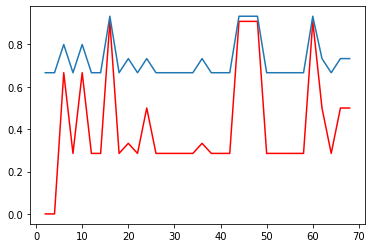

In [18]:
x_3 = []
y_f1_3 = []
y_score_3 = []
for i in range(2, 70, 2):
    mlp = MLPClassifier(solver = "lbfgs", random_state = 0,  max_iter = 500, hidden_layer_sizes = [i, i, i]).fit(X_data, y_data)
    predict = mlp.predict(X_test)
    x_3.append(i)
    y_f1_3.append(f1_score(y_test, predict))
    y_score_3.append(mlp.score(X_test, y_test))

plt.plot(x_3, y_f1_3, color = "red")
plt.plot(x_3, y_score_3)

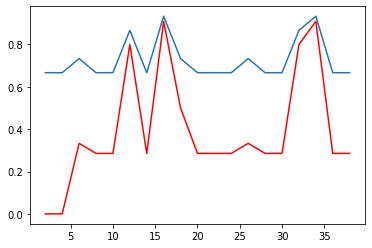

In [19]:
x_4 = []
y_f1_4 = []
y_score_4 = []
for i in range(2, 40, 2):
    mlp = MLPClassifier(solver = "lbfgs", random_state = 0,  max_iter = 500, hidden_layer_sizes = [i, i, i, i]).fit(X_data, y_data)
    predict = mlp.predict(X_test)
    x_4.append(i)
    y_f1_4.append(f1_score(y_test, predict))
    y_score_4.append(mlp.score(X_test, y_test))

plt.plot(x_4, y_f1_4, color = "red")
plt.plot(x_4, y_score_4)